In [90]:
import pandas as pd
import numpy as np

In [91]:
stock_data = pd.read_csv("stock_data.csv")
stock_data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [92]:
## Understanding the data
stock_data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [93]:
## Check whether data is imbalanced
stock_data.Sentiment.value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

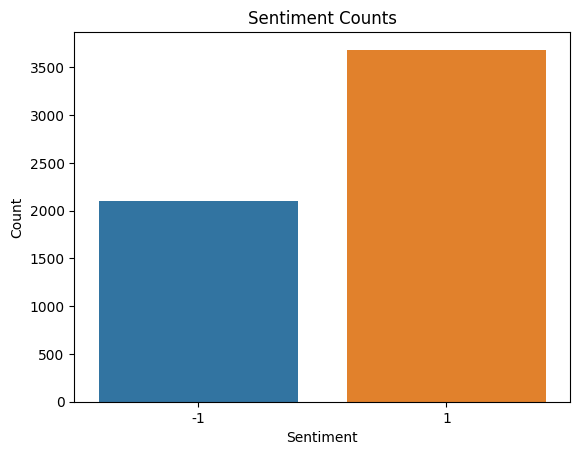

In [94]:
## Plot sentiment data
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sentiment', data = stock_data)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [95]:
## Cleaning data
import string
import nltk

## Remove punctuation
stock_data['Cleaned'] = stock_data['Text'].apply(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))

## Remove stop words since they are not really relevant in the prediction
from nltk.corpus import stopwords
stop = stopwords.words('english')
stock_data['Cleaned'] = stock_data['Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Stemming (removing prefix)
from nltk.stem import PorterStemmer
st = PorterStemmer()
stock_data['Cleaned'] = stock_data['Cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

stock_data


,Text,Sentiment,Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movi 55 return fea geed indic 15 trad...
2,user I'd be afraid to short AMZN - they are lo...,1,user i afraid short amzn look like near monopo...
3,MNTA Over 12.00,1,mnta over 12 00
4,OI Over 21.37,1,oi over 21 37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industri bodi cii said discom like suffer net ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,gold price slip rs 46 000 investor book profit...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agre 10 wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex day’ high 600 point ni...


In [96]:
## Preprocessing sentiment from -1 , 1 to 0 , 1
stock_data['Sentiment'] = stock_data['Sentiment'].replace(-1, 0)
stock_data

,Text,Sentiment,Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movi 55 return fea geed indic 15 trad...
2,user I'd be afraid to short AMZN - they are lo...,1,user i afraid short amzn look like near monopo...
3,MNTA Over 12.00,1,mnta over 12 00
4,OI Over 21.37,1,oi over 21 37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industri bodi cii said discom like suffer net ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,gold price slip rs 46 000 investor book profit...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agre 10 wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex day’ high 600 point ni...


In [97]:
from sklearn.model_selection import train_test_split

X = stock_data['Cleaned']
y = stock_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [103]:
## Vectorise data\
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(stock_data['Text'])

X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

In [107]:
## Using SVM to classify
from sklearn import svm

model_svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model_svm.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [108]:
# Predict sentiments using model
predictions_svm = model_svm.predict(X_test)


In [109]:
# Show classification report
from sklearn import metrics
print(metrics.classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64       528
           1       0.78      0.87      0.83       920

    accuracy                           0.77      1448
   macro avg       0.75      0.73      0.74      1448
weighted avg       0.76      0.77      0.76      1448



In [110]:
# Show accuracy
print(metrics.accuracy_score(y_test, predictions_svm))


0.7665745856353591
